Import tensorflow prebuilt dataset MNIST

In [ ]:
import tensorflow.compat.v1 as tf
train,test = tf.keras.datasets.mnist.load_data()

train,test both have X,Y arrays

In [ ]:
train_x = train[0]
train_y = train[1]
test_x = test[0]
test_y = test[1]
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Visualize the data

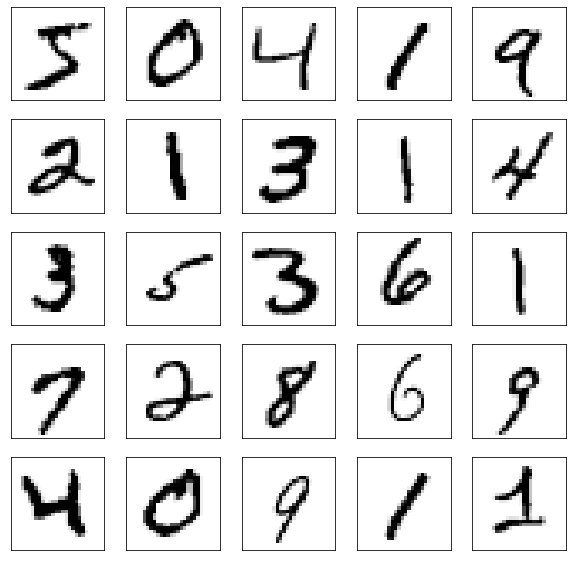

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_x[i],cmap='Greys')
  plt.xlabel(trai)
plt.show()

Reshape / Faltten X array Batch_Size x Features

Make Y Array Batch_Size x Classes (One hot Encoding)

In [ ]:
import numpy as np
train_x = np.reshape(train_x,[-1,784])
test_x = np.reshape(test_x,[-1,784])
print(train_x.shape)
print(test_x.shape)
train_y = tf.keras.utils.to_categorical(train_y)
test_y = tf.keras.utils.to_categorical(test_y)
print(train_y.shape)
print(test_y.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


Time to create Computation Graph

In [ ]:
mnist_graph = tf.Graph()
print('Empty Graph Created')

Empty Graph Created


Add Nodes in graph

In [ ]:
with mnist_graph.as_default():
  x = tf.placeholder(tf.float32,shape=[None,784])
  y = tf.placeholder(tf.float32,[None,10])

  # layer 1 dim = 128
  layer_1 = tf.Variable(tf.truncated_normal([784,128]),trainable=True,name='layer_1')
  layer_1_out = tf.matmul(x,layer_1)
  layer_1_out = tf.sigmoid(layer_1_out)

  # layer 2 dim = 64
  layer_2 = tf.Variable(tf.truncated_normal([128,64]),trainable=True,name='layer_2')
  layer_2_out = tf.matmul(layer_1_out,layer_2)
  layer_2_out = tf.sigmoid(layer_2_out)

   # layer 2 dim = 10 , final layer
  layer_3 = tf.Variable(tf.truncated_normal([64,10]),trainable=True,name='layer_3')
  layer_3_out = tf.matmul(layer_2_out,layer_3)
  print(layer_3_out.get_shape())

  print('Layers are defined')

  loss = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=layer_3_out,name='loss')
  avg_loss = tf.reduce_mean(loss)

  optimizer = tf.train.AdamOptimizer(0.001).minimize(avg_loss)
  print('Loss and optimizer defined')

  # nodes to compute accuracy
  probs = tf.nn.softmax(layer_3_out)
  preds = tf.argmax(probs,axis=-1)
  hyps = tf.argmax(y,axis=-1)
  corrects = tf.cast(tf.equal(hyps,preds),tf.float32)
  acc = tf.reduce_mean(corrects)
  print('Accuracy computation graph nodes included')

  saver = tf.train.Saver(max_to_keep=2)
  


(None, 10)
Layers are defined
Loss and optimizer defined
Accuracy computation graph nodes included


Add training loops

In [ ]:
total = len(train_x) # 60000
print('Total %d data for training'%(total))
EPOCHS = 10
batch_size = 128
with tf.Session(graph=mnist_graph) as sess:
  sess.run(tf.global_variables_initializer())
  for e in range(EPOCHS):
    e_loss = 0
    e_acc = 0
    start = 0
    b_count = 0
    while start < total:
      end = min(start + batch_size,total)
      bx = train_x[start:end]
      by = train_y[start:end]
      data = {x:bx,y:by}
      b_loss,_,b_acc = sess.run([avg_loss,optimizer,acc],feed_dict=data)
      e_loss += b_loss
      e_acc += b_acc
      start = end
      b_count += 1
    e_loss /= b_count
    e_acc /= b_count
    saver.save(sess,'weights/mnist')
    print("Epoch %d / %d Loss %.3f Acc %0.3f"%(e+1,EPOCHS,e_loss,e_acc))

    


Total 60000 data for training
Epoch 1 / 10 Loss 2.289 Acc 0.374
Epoch 2 / 10 Loss 1.050 Acc 0.656
Epoch 3 / 10 Loss 0.786 Acc 0.745
Epoch 4 / 10 Loss 0.665 Acc 0.785
Epoch 5 / 10 Loss 0.592 Acc 0.811
Epoch 6 / 10 Loss 0.542 Acc 0.826
Epoch 7 / 10 Loss 0.503 Acc 0.839
Epoch 8 / 10 Loss 0.476 Acc 0.849
Epoch 9 / 10 Loss 0.448 Acc 0.857
Epoch 10 / 10 Loss 0.424 Acc 0.864


Find Test performance

In [ ]:
random_test_indx = np.random.randint(0,10000,size=[50])
print(random_test_indx)

test_batch_x = []
test_batch_y = []
for indx in random_test_indx:
  test_batch_x.append(test_x[indx])
  test_batch_y.append(test_y[indx])

test_batch_x = np.asarray(test_batch_x)
test_batch_y = np.asarray(test_batch_y)

print('Random Test data ready',test_batch_x.shape)
with tf.Session(graph=mnist_graph) as sess:
  saver.restore(sess,'weights/mnist')
  test_batch = {x:test_batch_x,y:test_batch_y}
  prediction,hypothesis,probabilities,accuracy = sess.run([preds,hyps,probs,acc],feed_dict=test_batch)
print(prediction)
print(hypothesis)
print(accuracy)
  

[9041 5447 9037 9201 3514 2576 5428 2323 8050 4310 6331  697 6500 5552
 1145 1550 7690 7034 7190 7287 6256 1358 9259 1599 9088 4048  251 5464
 7495 5580 6658 8844 7031 7414 2720 5944 6978 6226 1243 1240 4030 8114
 2553 5559 2188 7093 5961 1006 8338 9292]
Random Test data ready (50, 784)
INFO:tensorflow:Restoring parameters from weights/mnist
[6 9 0 2 3 1 0 9 3 5 3 4 5 1 4 5 3 8 0 2 4 1 2 4 8 0 1 4 9 9 9 2 0 8 9 2 0
 3 5 1 9 0 1 4 0 2 7 7 0 9]
[6 9 0 2 2 1 0 9 3 5 3 4 5 1 4 5 3 8 0 8 4 1 2 4 8 0 1 4 9 9 9 2 0 5 9 2 0
 3 5 1 9 0 1 4 0 2 9 7 0 9]
0.92


INFO:tensorflow:Restoring parameters from weights/mnist
[7 6 1 ... 4 5 6]


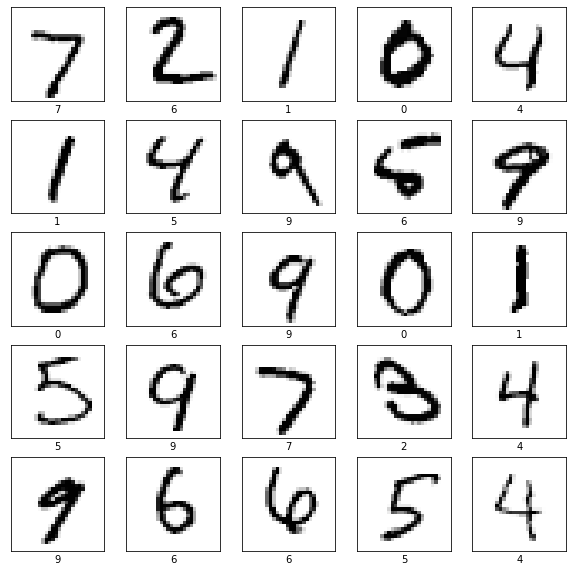

In [ ]:
another_test = test[0]
another_test_flat = np.reshape(another_test,[-1,784])

with tf.Session(graph=mnist_graph) as sess:
  saver.restore(sess,'weights/mnist')
  test_batch = {x:another_test_flat}
  predictions= sess.run(preds,feed_dict=test_batch)

print(predictions)

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(another_test[i],cmap='Greys')
  plt.xlabel(predictions[i])
plt.show()